In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## Prepare for LDtrait analysis

In [3]:
snps=pd.read_csv("../../snp-tables/immune-microenvironment-nonhla.tsv",delimiter="\t")
snps.head()

,snps,file,category,maf,variant,rsid,tpm beta,tpm SE,tpm P,REF,ALT,firebrowse beta,firebrowse SE,firebrowse P,pancan beta,pancan SE,pancan P,p-value,cis tss
0,1:249111684:T:C,SH3BP5L,immunomodulators,0.13030,chr1:g.249111684T>C,rs7419176,-0.138887,0.024709,1.971340e-08,T,C,-0.156999,0.024937,3.244430e-10,-0.153749,0.024547,3.982010e-10,3.244430e-10,-7034.0
1,13:108991004:A:G,TNFSF13B,immunomodulators,0.49380,chr13:g.108991004A>G,rs9520845,0.094528,0.016543,1.148140e-08,A,G,0.108154,0.016762,1.177210e-10,0.108267,0.016466,5.204390e-11,5.204390e-11,-69028.0
2,19:55175740:C:T,LILRB4,immunomodulators,0.37430,chr19:g.55175740C>T,rs3745871,0.552741,0.016038,7.971420e-241,C,T,-0.042462,0.017650,1.616310e-02,-0.048756,0.017292,4.823190e-03,7.971420e-241,-1470.0
3,19:55175983:T:A,LILRB4,immunomodulators,0.05939,chr19:g.55175983T>A,rs7253814,-0.588260,0.035009,3.632880e-62,T,A,0.109191,0.036245,2.599720e-03,0.111202,0.035470,1.725110e-03,3.632880e-62,-1713.0
4,19:55145546:T:G,LILRB4,immunomodulators,0.11450,chr19:g.55145546T>G,rs2098952,-0.288007,0.025738,7.953270e-29,T,G,-0.057270,0.026471,3.053910e-02,-0.052444,0.025963,4.342880e-02,7.953270e-29,28724.0


In [4]:
for num,data in enumerate(np.array_split(snps["rsid"], 10)):
    print(len(data))
    data.to_csv("../LDtrait/LDlink_input_"+str(num)+".tsv",header=None,index=None,sep="\t")

49
49
48
48
48
48
48
48
48
48


## Get LDtrait output

In [5]:
files=[x for x in os.listdir("../LDtrait") if x.startswith("LDlink_output_")]

In [6]:
total_gwas=pd.DataFrame()

for x in files:
    gwas=pd.read_csv("../LDtrait/"+x,delimiter="\t")
    total_gwas=total_gwas.append(gwas)

In [7]:
mp_trait={}

for x in total_gwas["Query"].unique():
    mp_trait[x]=total_gwas[total_gwas["Query"]==x]["GWAS Trait"].unique().tolist()
    
    

## Merge with associations

In [8]:
snps["gwas"]=snps["rsid"].map(mp_trait)

In [12]:
snps.to_csv("../../snp-tables/immune-microenvironment-nonhla.tsv",sep="\t",index=None)

In [13]:
# immune_snps=snps[snps["Category"]=="Immune"]["snps"].unique().tolist()
# cancer_snps=snps[snps["Category"]=="Cancer"]["snps"].unique().tolist()
# other_snps=[x for x in snps["snps"].unique() if x not in immune_snps+cancer_snps]
# total=len(other_snps)+len(immune_snps)+len(cancer_snps)

In [14]:
# f=plt.figure(figsize=(5,5))
# labels = 'other', 'immune', 'cancer'
# sizes = [len(other_snps)/total,len(immune_snps)/total,len(cancer_snps)/total]
# colors = ['gray', 'orange',"blue"]
# explode = (0.0, 0.0, 0.1)  # explode 1st slice
# # Plot
# plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
# plt.axis('equal')
# f.savefig("gwas.category.pdf")

## Get highest associated traits

In [15]:
g=[]
c=[]

for x in total_gwas["GWAS Trait"].unique():
    g.append(x)
    c.append(len(total_gwas[total_gwas["GWAS Trait"]==x]["Query"].unique()))

In [16]:
gwas_counts=pd.DataFrame({"gwas":g,"counts":c})
gwas_counts=gwas_counts.sort_values(by="counts",ascending=False)

In [17]:
gwas_counts["counts"]=gwas_counts["counts"]

In [18]:
gwas_counts_filt=gwas_counts[gwas_counts["counts"]>5]

In [19]:
gwas_counts_filt["gwas"]=gwas_counts_filt["gwas"].str.split("(").str[0]

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
mp={"Asthma ":"Asthma"}

In [21]:
gwas_counts_filt["gwas"]=gwas_counts_filt["gwas"].map(mp).fillna(gwas_counts_filt["gwas"])

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


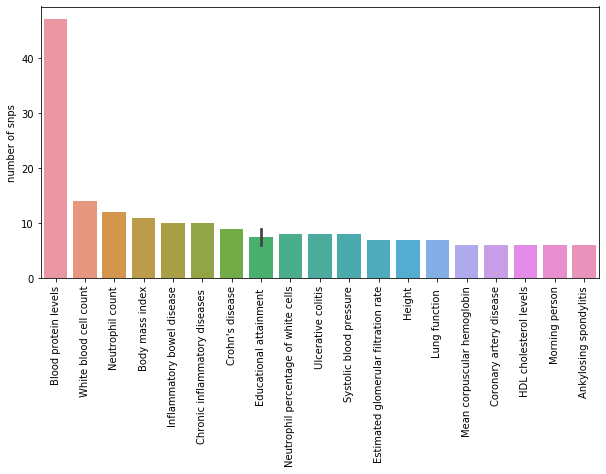

In [23]:
f=plt.figure(figsize=(10,5))
ax = sns.barplot(x="gwas", y="counts", data=gwas_counts_filt)
plt.xlabel("")
plt.ylabel("number of snps")
plt.xticks(rotation=90)
f.savefig("../plots/gwas.pdf")

## Get Chat et al. autoimmune snps

In [104]:
chat=pd.read_csv("Chatetal2019_supplementaltable1.csv")

In [105]:
chat.head()

,SNP,Mapped Genes,Chromosome Position,Associated Diseases,Maximum reported p-value,References
0,rs10488631,"TNPO3, IRF5",chr7:128954129,"Lupus, rheumatoid arthritis, systemic sclerosis",1.860000e-13,[1]
1,rs11203203,UBASH3A,chr21:42416077,"Celiac disease, rheumatoid arthritis, type 1 d...",3.600000e-04,[2]
2,rs11209026,"IL12RB2, IL23R",chr1:67240275,"Ankylosing spondylitis, colitis, inflammatory ...",1.730000e-10,[3]
3,rs12720356,TYK2,chr19:10359299,"Colitis, inflammatory bowel, cutaneous psoriasis",3.900000e-06,[4]
4,rs1295686,"RAD50, IL13, IL4, KIF3A",chr5:132660151,"Allergy, asthma, cutaneous psoriasis",1.400000e-07,[5]


In [106]:
snps=pd.read_csv("../snp-tables/immune-microenvironment-snps-all.tsv",delimiter="\t")

In [107]:
snps["variant"]=snps["snps"].str.rsplit(":",2).str[0]
snps["variant"]="chr"+snps["variant"]

In [108]:
snps[snps["variant"].isin(chat["Chromosome Position"].tolist())]

,indexsnps,snps,file,p-value,variant
